In [1]:
import pandas as pd

In [2]:
pls = pd.read_json("D:/JESUS/DATA SCIENCE/SPOTIFY/MyData/Playlist1.json")

In [3]:
def parse_playlist(pl):
    try:
        ret = pd.concat([pd.DataFrame(pl['items'][i]['track'], index = [i]) for i in range(len(pl['items']))])\
            .assign(name = pl['name'])\
            [['name', 'trackName', 'artistName', 'albumName']]
    except:
        ret = pd.DataFrame(columns = ['name', 'trackName', 'artistName', 'albumName'])
    return(ret)

In [4]:
playlists = pd.concat([parse_playlist(pls.playlists[i]) for i in range(len(pls))])

C:\Users\jagui\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
streaming_hist = pd.concat([
    pd.read_json(f"D:/JESUS/DATA SCIENCE/SPOTIFY/MyData/StreamingHistory{i}.json")\
               for i in range(0, 5)])\
    .assign(skipped = lambda x: x.msPlayed < 10000)\
    .assign(ds = lambda x: pd.to_datetime(x.endTime))\
    .assign(day = lambda x: x.ds.dt.date)


In [6]:
streaming_hist\
    .loc[lambda x: ~x.skipped]\
    .assign(hour = lambda x: x.ds.dt.hour)\
    .groupby("hour").size()

hour
0       70
1       27
2       23
3        5
4        7
5      134
6      607
7     1602
8     1186
9      646
10     678
11     871
12     972
13    1176
14     997
15     799
16     876
17    1254
18    1610
19    1638
20    1146
21     616
22     231
23     110
dtype: int64

In [132]:
streaming_hist\
    .loc[lambda x: ~x.skipped]\
    .loc[lambda x: x.artistName == "blink-182"]\
    .assign(hour = lambda x: x.ds.dt.hour)\
    .groupby("hour").size()

hour
0       2
1       6
2       4
4       2
5      45
6     278
7     497
8     359
9     154
10    159
11    185
12    225
13    317
14    268
15    144
16    301
17    446
18    401
19    573
20    273
21    157
22     73
23     12
dtype: int64

In [106]:
streaming_hist.shape

(43985, 6)

In [107]:
streaming_hist.skipped.mean()
    

0.6071160622939639

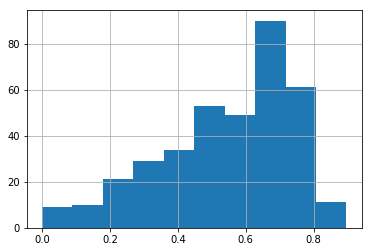

In [110]:
streaming_hist\
    .assign(skipped = lambda x: x.msPlayed < 10000)\
    .groupby("day").skipped.mean().hist()

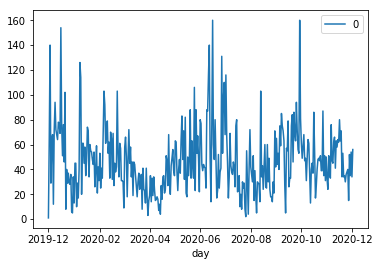

In [114]:
streaming_hist\
    .assign(skipped = lambda x: x.msPlayed < 10000)\
    .loc[lambda x: ~x.skipped]\
    .groupby("day").size().reset_index().plot(x = "day", y = 0)

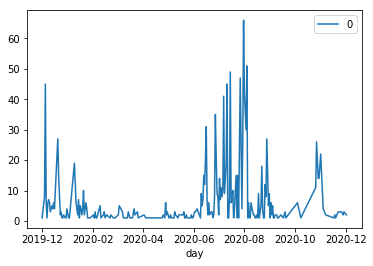

In [117]:
streaming_hist\
    .assign(skipped = lambda x: x.msPlayed < 10000)\
    .loc[lambda x: ~x.skipped]\
    .loc[lambda x: x.artistName == "Sum 41"].groupby("day").size().reset_index().plot(x = "day", y = 0)

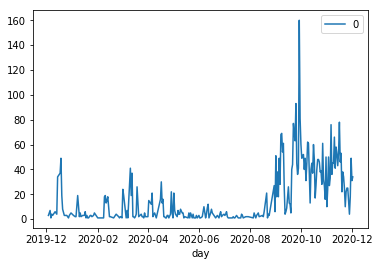

In [8]:
streaming_hist\
    .assign(skipped = lambda x: x.msPlayed < 10000)\
    .loc[lambda x: ~x.skipped]\
    .loc[lambda x: x.artistName == "blink-182"].groupby("day").size().reset_index().plot(x = "day", y = 0)

In [12]:
!pip install numpy --upgrade --user

Requirement already up-to-date: numpy in c:\users\jagui\anaconda3\lib\site-packages (1.19.4)


You should consider upgrading via the 'c:\users\jagui\anaconda3\python.exe -m pip install --upgrade pip' command.


In [11]:
import seaborn as sns

ModuleNotFoundError: No module named 'numpy.testing.decorators'

In [ ]:
sns.lin

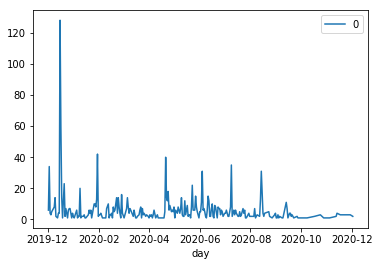

In [121]:
streaming_hist\
    .assign(skipped = lambda x: x.msPlayed < 10000)\
    .loc[lambda x: ~x.skipped]\
    .loc[lambda x: x.artistName == "Red Hot Chili Peppers"].groupby("day").size().reset_index().plot(x = "day", y = 0)

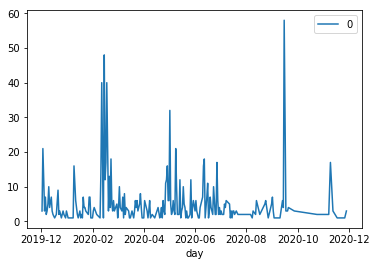

In [122]:
streaming_hist\
    .assign(skipped = lambda x: x.msPlayed < 10000)\
    .loc[lambda x: ~x.skipped]\
    .loc[lambda x: x.artistName == "Foo Fighters"].groupby("day").size().reset_index().plot(x = "day", y = 0)

In [49]:
streaming_hist.endTime.max()

'2020-12-02 20:35'

In [36]:
streaming_hist\
    .assign(ds = lambda x: pd.to_datetime(x.endTime))\
    .assign(day = lambda x: x.ds.dt.date)\
    .groupby(["artistName", "trackName", "day"]).size().sort_values(ascending = False)

artistName             trackName                        day       
Lifehouse              Hanging By A Moment              2020-01-17    37
blink-182              Going Away To College            2020-09-23    25
                                                        2020-09-24    24
                       All Of This                      2020-09-29    23
Fall Out Boy           Uma Thurman                      2020-05-25    22
blink-182              Dysentery Gary                   2020-09-23    20
                       The Rock Show                    2020-09-07    19
                       Aliens Exist                     2020-09-24    19
The Pretty Reckless    Cold Blooded                     2020-06-09    19
blink-182              Always                           2020-09-29    18
Fall Out Boy           Novocaine                        2020-05-25    18
Red Hot Chili Peppers  Road Trippin'                    2020-04-21    17
Claude Debussy         Debussy: Claro de luna           2

In [39]:
streaming_hist\
    .loc[lambda x: x.msPlayed>10000]\
    .assign(ds = lambda x: pd.to_datetime(x.endTime))\
    .assign(day = lambda x: x.ds.dt.date)\
    .groupby(["artistName", "trackName", "day"]).size().sort_values(ascending = False)\
    .groupby(["artistName", "trackName"]).size().sort_values(ascending = False)\
    

artistName             trackName                                                                                  
blink-182              I Miss You                                                                                     153
Red Hot Chili Peppers  Wet Sand                                                                                       115
blink-182              Stay Together For The Kids                                                                     114
                       After Midnight                                                                                 110
                       What's My Age Again?                                                                           102
                       All The Small Things                                                                           102
                       Adam's Song                                                                                     96
Sum 41                 Pieces  

In [51]:
streaming_hist\
    .loc[lambda x: x.msPlayed>10000]\
    .loc[lambda x: x.trackName == "I Miss You"]\
    .assign(ds = lambda x: pd.to_datetime(x.endTime))\
    .assign(day = lambda x: x.ds.dt.date)\
    .groupby(["artistName", "trackName", "day"]).size().reset_index().sort_values("day")\
    .assign(week = lambda x: x.day - pd.to_timedelta(x.day.dt.weekday, unit='D'))\
    .plot(x = "week", y = 0, kind = "line")

AttributeError: Can only use .dt accessor with datetimelike values

In [31]:
streaming_hist.dtypes

artistName    object
endTime       object
msPlayed       int64
trackName     object
dtype: object

In [17]:
streaming_hist.groupby(["artistName", "trackName"]).size().sort_values(ascending = False)\
    .reset_index()

,artistName,trackName,0
0,blink-182,I Miss You,371
1,blink-182,Adam's Song,352
2,blink-182,All The Small Things,351
3,blink-182,Stay Together For The Kids,342
4,blink-182,What's My Age Again?,328
5,blink-182,After Midnight,304
6,blink-182,Dammit,298
7,blink-182,Man Overboard,277
8,Red Hot Chili Peppers,Wet Sand,249
9,blink-182,Feeling This,241
